<a href="https://colab.research.google.com/github/eunhaday/AIFFEL_quest_cr/blob/master/MainQuest/QUEST04/olympic_1005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# 데이터 불러오기
noc_region = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/noc_regions.csv')   #noc_regions.csv()
athlete_events = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/athlete_events.csv')  #athlete_events.csv (선수이벤트)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#초기 데이터셋 탐색

# noc_region의 열과 행의 갯수 확인
print(noc_region.shape)

# ahtlete_events의 열과 행의 갯수 확인
print(athlete_events.shape)

# noc_region의 상위 5개 데이터 확인
print(noc_region.head())

# athlete_events의 상위 5개 데이터 확인
print(athlete_events.head())


(230, 3)
(271116, 15)
   NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  190

In [ ]:
# 데이터 병합 outer join
all_data = pd.merge(athlete_events, noc_region, how='outer', on='NOC')

# 병합된 데이터 확인
print(all_data.head())

# all_data의 noc와 noc_region의 noc의 항목명 차집합 확인
print(set(all_data['NOC']) - set(noc_region['NOC']))

# 싱가포르의 NOC가 서로 다름을 확인함.

# athlete_events의 NOC 열의 SGP를 SIN으로 변경
#athlete_events['NOC'] = athlete_events['NOC'].replace('SGP', 'SIN')
noc_region['NOC'] = noc_region['NOC'].replace('SIN', 'SGP')


# 데이터 새로 병합해서 all_data에 저장
all_data = pd.merge(athlete_events, noc_region)

# region, notes 열 대문자로 변경
all_data.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

       ID                   Name Sex   Age  Height  Weight         Team  NOC  \
0   502.0      Ahmad Shah Abouwi   M   NaN     NaN     NaN  Afghanistan  AFG   
1  1076.0  Jammal-ud-Din Affendi   M  28.0     NaN     NaN  Afghanistan  AFG   
2  1101.0   Mohammad Anwar Afzal   M   NaN     NaN     NaN  Afghanistan  AFG   
3  1745.0         Mohammad Aktar   M  17.0   156.0    48.0  Afghanistan  AFG   
4  4628.0  Mohammad Daoud Anwary   M  22.0     NaN     NaN  Afghanistan  AFG   

         Games    Year  Season       City      Sport  \
0  1956 Summer  1956.0  Summer  Melbourne     Hockey   
1  1936 Summer  1936.0  Summer     Berlin     Hockey   
2  1948 Summer  1948.0  Summer     London   Football   
3  1980 Summer  1980.0  Summer     Moskva  Wrestling   
4  1964 Summer  1964.0  Summer      Tokyo  Wrestling   

                                        Event Medal       region notes  
0                         Hockey Men's Hockey   NaN  Afghanistan   NaN  
1                         Hockey Men

In [ ]:
# 중복치 갯수 확인
print(all_data.duplicated().sum())

# 중복치가 어디서 발생하는지 확인
print(all_data[all_data.duplicated()])

# 5540 부터 5543 행 자세히 출력
print(all_data[5540:5545])

# 중복치 제거
all_data = all_data.drop_duplicates()

# 중복치 제거 확인
print(f"total duplicates : {all_data.duplicated().sum()}")

1385
            ID                                 Name Sex   Age  Height  Weight  \
1252       704                   Dsir Antoine Acket   M  27.0     NaN     NaN   
4282      2449               William Truman Aldrich   M  48.0     NaN     NaN   
4283      2449               William Truman Aldrich   M  48.0     NaN     NaN   
4862      2777               Hermann Reinhard Alker   M  43.0     NaN     NaN   
4864      2777               Hermann Reinhard Alker   M  43.0     NaN     NaN   
...        ...                                  ...  ..   ...     ...     ...   
269994  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269995  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269997  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269999  135073   Doris Clare Zinkeisen (-Johnstone)   F  49.0     NaN     NaN   
270200  135173                     Henri Achille Zo   M  58.0     NaN     NaN   

                 Team 

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
Region        21
Notes     264696
dtype: int64
            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0  

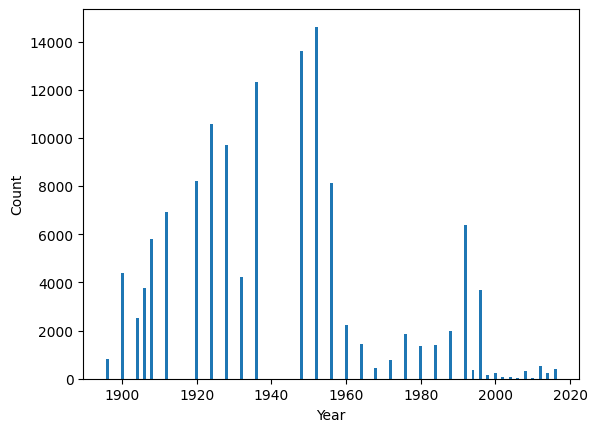

In [ ]:
# 결측치 확인
print(all_data.isnull().sum())

# 결측치 있는 행들 확인
print(all_data[all_data.isnull().any(axis=1)])

# Region 결측치 확인
print(all_data[all_data['Region'].isnull()])

# Region 결측치 Team과 동일하게 채워넣기
all_data['Region'] = all_data['Region'].fillna(all_data['Team'])

#Medal -> Medal_gb으로 열추가
all_data['Medal'].value_counts(dropna=False)
all_data = all_data.assign(Medal_gb=0) #No medal = 0
all_data.loc[(all_data['Medal'].notna()) & (all_data['Medal'] == 'Gold'), 'Medal_gb'] = 1  #Gold = 1
all_data.loc[(all_data['Medal'].notna()) & (all_data['Medal'] == 'Silver'), 'Medal_gb'] = 2 #Silver = 2
all_data.loc[(all_data['Medal'].notna()) & (all_data['Medal'] == 'Bronze'), 'Medal_gb'] = 3  #Bronze = 3
all_data['Medal_gb'].value_counts(dropna=False)

#Medal -> Medal_cnt로 열추가
all_data = all_data.assign(Medal_cnt= 0)
# Medal 값이 있는경우 1로 cnt처리
all_data.loc[(all_data['Medal'].notna()), 'Medal_cnt'] = 1

# Medal 결측치 'No medal'로 채워넣기
all_data['Medal'] = all_data['Medal'].fillna('No medal')

# Notes 결측치 'No notes'로 채워넣기
all_data['Notes'] = all_data['Notes'].fillna('No notes')

# 각 행의 결측치 수를 확인하고 'miss_data' 열로 추가
all_data["miss_data"] = all_data.isnull().sum(axis=1)

# 년도별 결측치 총합 계산 후 내림차순 정렬
n_miss_data = all_data.groupby('Year')['miss_data'].sum().sort_values(ascending=False)


# 시각화
plt.bar(n_miss_data.index, n_miss_data.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


보다시피 결측치가 상당히 많음.
60년대 이전으로 많이 분포하고 있는데.
이를 버릴 수가 없었음. 중요한 데이터이기 때문에.
그리고 아예 비워져있는게 아니라 일부 데이터가 없는 것이라.
채워주면 된다고 생각함.
결측치를 채워줄 때, 옵션이 아래와 같았음.

중간값 혹은 평균값 대체
단점 =
회귀 대체
단점 = 선형적 표현으로 다양한 측면 고려가 어려움.
KNN
장점 = 데이터가 많고 또 비선형적인 패턴을 찾을 수 있기에 해당 문제를 해결하기에 최적의 옵션이라고 생각함.
  
결론적으로 KNN으로 결측치를 대체하기로함.
키, 몸무게, 나이끼리의 상관관계 뿐만 아니라. 국가와 종목까지 고려하여서.
이웃 최근접 값을 찾아 주었음.

물론 어디까지나 없는 값을 채워주는 것이기에.이것이 정확하다고 볼 수는 없을 것임.
그래도. 단순히 중간값으로 채워주는 것 보다는 좀 더 다채로운 특징을 살려준 채로 채우는거라.
차후 분석시에 조금 더 정확한 분석이 나올 것으로 예상되었음.

K값을 10으로 두어서 계산했고 약 13분 소요됨
K값이란, 결측치를 중심으로 인접한 속성 값을 몇 개까지 볼 것인가를 뜻함.

결과는 아래와 같음.
X축은 각각 나이, 몸무게, 키 이고, Y축은 연도로 설정하여 분포도를 나타냄

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  269731 non-null  int64  
 1   Name                269731 non-null  object 
 2   Sex                 269731 non-null  object 
 3   Age                 269731 non-null  float64
 4   Height              269731 non-null  float64
 5   Weight              269731 non-null  float64
 6   Team                269731 non-null  object 
 7   NOC                 269731 non-null  object 
 8   Games               269731 non-null  object 
 9   Year                269731 non-null  int64  
 10  Season              269731 non-null  object 
 11  City                269731 non-null  object 
 12  Sport               269731 non-null  object 
 13  Event               269731 non-null  object 
 14  Medal               269731 non-null  object 
 15  Region              269731 non-nul

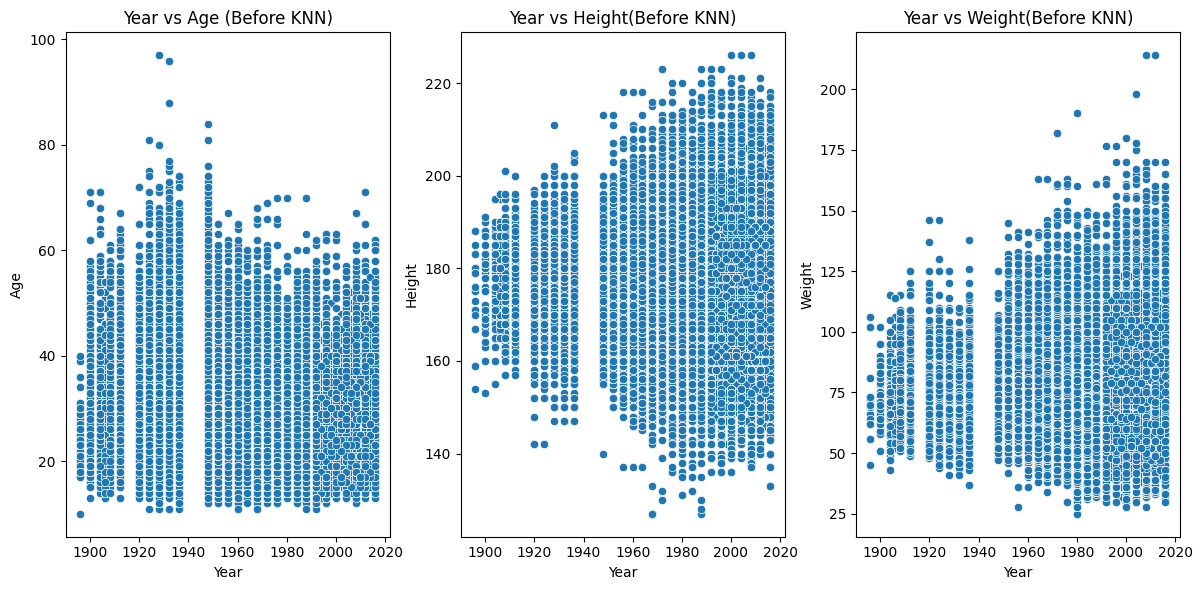

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# KNN 적용 전 분포도 시각화
plt.figure(figsize=(12, 6))

# Age vs Year 분포도
plt.subplot(1, 3, 1)
#sns.scatterplot(x='Age', y='Year', data=all_data)
#plt.title('Age vs Year (Before KNN)')
sns.scatterplot(x='Year', y='Age', data=all_data)
plt.title('Year vs Age (Before KNN)')

# Height vs Year 분포도
plt.subplot(1, 3, 2)
#sns.scatterplot(x='Height', y='Year', data=all_data)
#plt.title('Height vs Year (Before KNN)')
sns.scatterplot(x='Year', y='Height', data=all_data)
plt.title('Year vs Height(Before KNN)')

# Weight vs Year 분포도
plt.subplot(1, 3, 3)
#sns.scatterplot(x='Weight', y='Year', data=all_data)
#plt.title('Weight vs Year (Before KNN)')
sns.scatterplot(x='Year', y='Weight', data=all_data)
plt.title('Year vs Weight(Before KNN)')

plt.tight_layout()
plt.show()

# KNN모델 반영 전 결측치 추적
all_data['Age_was_missing'] = all_data['Age'].isnull()
all_data['Height_was_missing'] = all_data['Height'].isnull()
all_data['Weight_was_missing'] = all_data['Weight'].isnull()

In [ ]:
# KNN Imputer 적용 코드
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# 'NOC' 열과 'Sport' 열을 Label Encoding으로 수치형 변환
le_noc = LabelEncoder()
all_data['NOC_encoded'] = le_noc.fit_transform(all_data['NOC'])

le_sport = LabelEncoder()
all_data['Sport_encoded'] = le_sport.fit_transform(all_data['Sport'])

# KNN을 적용할 열 목록 (국가와 종목 포함)
columns_to_impute = ['Age', 'Height', 'Weight', 'Sport_encoded', 'NOC_encoded']

# StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
all_data[columns_to_impute] = scaler.fit_transform(all_data[columns_to_impute])

# KNNImputer로 결측치 대체
imputer = KNNImputer(n_neighbors=10)
all_data[columns_to_impute] = imputer.fit_transform(all_data[columns_to_impute])

# 스케일링을 원래대로 되돌림
all_data[columns_to_impute] = scaler.inverse_transform(all_data[columns_to_impute])

# 결측치가 잘 채워졌는지 확인
print(all_data.isnull().sum())
columns_to_impute = ['Age', 'Height', 'Weight']
imputer = KNNImputer(n_neighbors=10)
all_data[columns_to_impute] = imputer.fit_transform(all_data[columns_to_impute])

ID                    0
Name                  0
Sex                   0
Age                   0
Height                0
Weight                0
Team                  0
NOC                   0
Games                 0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal                 0
Region                0
Notes                 0
Medal_gb              0
Medal_cnt             0
miss_data             0
Age_was_missing       0
Height_was_missing    0
Weight_was_missing    0
NOC_encoded           0
Sport_encoded         0
dtype: int64


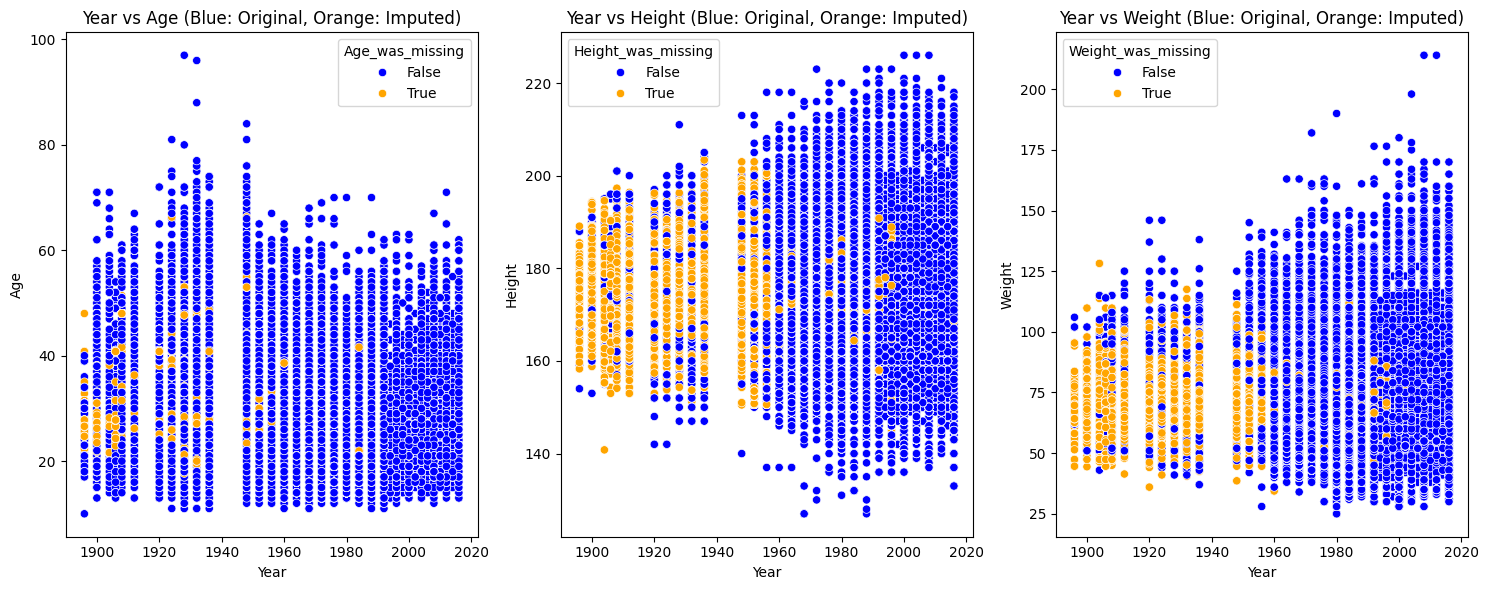

In [ ]:
# KNN 적용 후 분포도 시각화
plt.figure(figsize=(15, 6))

# Age vs Year 분포도 (KNN 적용 후, 결측치 채워진 부분 추적)
plt.subplot(1, 3, 1)
#sns.scatterplot(x='Age', y='Year', data=all_data, hue='Age_was_missing', palette={True: 'orange', False: 'blue'})
#plt.title('Age vs Year (Blue: Original, Orange: Imputed)')
sns.scatterplot(x='Year', y='Age', data=all_data, hue='Age_was_missing', palette={True: 'orange', False: 'blue'}) #누락된결측치값:orange로 표시
plt.title('Year vs Age (Blue: Original, Orange: Imputed)') #Orange: 결측치변경한값

# Height vs Year 분포도
plt.subplot(1, 3, 2)
#sns.scatterplot(x='Height', y='Year', data=all_data, hue='Height_was_missing', palette={True: 'orange', False: 'blue'})
#plt.title('Height vs Year (Blue: Original, Orange: Imputed)')
sns.scatterplot(x='Year', y='Height', data=all_data, hue='Height_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Year vs Height (Blue: Original, Orange: Imputed)')

# Weight vs Year 분포도
plt.subplot(1, 3, 3)
#sns.scatterplot(x='Weight', y='Year', data=all_data, hue='Weight_was_missing', palette={True: 'orange', False: 'blue'})
#plt.title('Weight vs Year (Blue: Original, Orange: Imputed)')
sns.scatterplot(x='Year', y='Weight', data=all_data, hue='Weight_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Year vs Weight (Blue: Original, Orange: Imputed)')

plt.tight_layout()
plt.show()

In [ ]:
# 데이터 프레임 저장
#all_data.to_csv('./Data/cleaned_all_data.csv', index=False)
all_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/cleaned_all_data_1005.csv', index=False)

이제 깨끗히 정리된 데이터가 준비되었으니.
기본적인 분석을 진행 해보자
- 기본적 분석

In [ ]:
# 올림픽에 참여한 총 선수 수
althlete_count = all_data['Name'].nunique()
print(f"Total number of athletes: {althlete_count}")

Total number of athletes: 134732


In [ ]:
# 남성과 여성 선수 수 와 Pie chart
male_count = all_data[all_data['Sex'] == 'M']['Name'].nunique()
female_count = all_data[all_data['Sex'] == 'F']['Name'].nunique()
print(f"Total number of male athletes: {male_count}")
print(f"Total number of female athletes: {female_count}")

Total number of male athletes: 100979
Total number of female athletes: 33808


134,732 / 134,787
?? 차이가 발생하네 동명이인이라도 있나.


In [ ]:
# 선수의 고유한 수를 이름, 성별, 국가 조합으로 계산
athlete_count = all_data[['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
print(f"Total number of athletes: {athlete_count}")

# 남성과 여성 선수 수 계산 (이름, 성별, 국가 조합 기준)
male_count = all_data[all_data['Sex'] == 'M'][['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
female_count = all_data[all_data['Sex'] == 'F'][['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
print(f"Total number of male athletes: {male_count}")
print(f"Total number of female athletes: {female_count}")

Total number of athletes: 136657
Total number of male athletes: 102337
Total number of female athletes: 34320


# -> 대한민국 set 생성

In [ ]:
"""
- 대한민국 자료중 나이,몸무게,키 결측치가 있는건이 있는지 확인
- 대한민국 자료중 종목기준으로 현재 메달정보 체크
- 세계종목, 한국종목 비교후 아직 소외된종목 확인 , 노메달인 대상 종목추리기
- 최근 메달의 추이를확인
- 종목간 성별,나이,키등 신체적인 조건 확인
-
"""

'\n- 대한민국 자료중 나이,몸무게,키 결측치가 있는건이 있는지 확인\n- 대한민국 자료중 종목기준으로 현재 메달정보 체크\n- 세계종목, 한국종목 비교후 아직 소외된종목 확인 , 노메달인 대상 종목추리기\n- 최근 메달의 추이를확인\n- 종목간 성별,나이,키등 신체적인 조건 확인\n-\n'

# 데이타셋 변수 참조

   - 원본 : athlete_events, noc_region
   - 머지 : all_data
   - 한국자료 : df_kor

In [ ]:
#--------------------------------------------------------
# 파일을 만든후 새로 시작할때 필요한 import부분
#--------------------------------------------------------

# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv


# 데이터 불러오기
noc_region = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/noc_regions.csv')   #noc_regions.csv()
athlete_events = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/athlete_events.csv')  #athlete_events.csv (선수이벤트)

# athlete_events의 NOC 열의 SGP를 SIN으로 변경
noc_region['NOC'] = noc_region['NOC'].replace('SIN', 'SGP')

#두 csv파일을 merge하고 정제한 최종파일
all_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/cleaned_all_data_1005.csv')  #\merge하고 정재한 최종csv

#대한민국 건수 noc = kor
len(all_data[all_data['NOC'] == 'KOR'])  #전체건수 : 4464

#대한민국 자료만 추려서 자료확인필요
df_kor = pd.DataFrame(all_data[all_data['NOC'] == 'KOR'])
len(df_kor)

# 데이터 프레임 저장
df_kor.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/cleaned_all_korea.csv', index=False)
df_kor.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Region,Notes,Medal_gb,Medal_cnt,miss_data,Age_was_missing,Height_was_missing,Weight_was_missing,NOC_encoded,Sport_encoded
2519,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,...,South Korea,No notes,0,0,0,False,False,False,109.0,17.0
2520,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,...,South Korea,No notes,0,0,0,False,False,False,109.0,17.0
2521,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,...,South Korea,No notes,0,0,0,False,False,False,109.0,17.0


In [ ]:
#전체(한국) 대상데이타셋 추출
df_kor1 = df_kor[['ID','Name','Sex','Year','Season','Sport','Event','Medal_gb','Medal_cnt']]
df_kor1.head(10)

,ID,Name,Sex,Year,Season,Sport,Event,Medal_gb,Medal_cnt
2519,1422,Ahn Jin-Soo,M,1992,Winter,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,0,0
2520,1422,Ahn Jin-Soo,M,1992,Winter,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,0,0
2521,1422,Ahn Jin-Soo,M,1992,Winter,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,0,0
2522,1422,Ahn Jin-Soo,M,1992,Winter,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,0,0
2523,1422,Ahn Jin-Soo,M,1994,Winter,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,0,0
2524,1422,Ahn Jin-Soo,M,1994,Winter,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,0,0
2525,1422,Ahn Jin-Soo,M,1994,Winter,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,0,0
2526,1422,Ahn Jin-Soo,M,1998,Winter,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,0,0
2527,1422,Ahn Jin-Soo,M,1998,Winter,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,0,0
2528,1422,Ahn Jin-Soo,M,1998,Winter,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,0,0


In [ ]:
#df_kor_gb = df_kor1.groupby('ID')['Medal_cnt'].agg(['sum','count'])
df_kor_gb = df_kor1.groupby('ID')['Medal_cnt'].agg(['sum','count'])

sort_gb = df_kor_gb.sort_values(by=['sum','count','ID'], ascending=False)

sort_gb.head(3)

,sum,count
ID,,
54882,6,8
60274,6,6
67926,5,9


In [ ]:
df_kor1[df_kor1['ID'] == 54882 ]

,ID,Name,Sex,Year,Season,Sport,Medal_gb,Medal_cnt
107906,54882,Jin Jong-O,M,2004,Summer,Shooting,0,0
107907,54882,Jin Jong-O,M,2004,Summer,Shooting,2,1
107908,54882,Jin Jong-O,M,2008,Summer,Shooting,2,1
107909,54882,Jin Jong-O,M,2008,Summer,Shooting,1,1
107910,54882,Jin Jong-O,M,2012,Summer,Shooting,1,1
107911,54882,Jin Jong-O,M,2012,Summer,Shooting,1,1
107912,54882,Jin Jong-O,M,2016,Summer,Shooting,0,0
107913,54882,Jin Jong-O,M,2016,Summer,Shooting,1,1


- 선수(ID)별 메달수, 종목


In [ ]:
df_kor_gb = df_kor1.groupby('ID')['Medal_cnt'].agg(['sum','count']).sort_values(by=['sum','count'], ascending=False)
len(df_kor_gb)

2393

In [ ]:
df_kor_gb[df_kor_gb['count'] > 21]

,sum,count
ID,,
68029,2,24
54559,0,24
55000,0,22
59841,0,22


In [ ]:
df_kor1[df_kor1['ID'] == 68029]

,ID,Name,Sex,Year,Season,Sport,Medal_gb,Medal_cnt
134449,68029,Lee Ju-Hyeong,M,1992,Summer,Gymnastics,0,0
134450,68029,Lee Ju-Hyeong,M,1992,Summer,Gymnastics,0,0
134451,68029,Lee Ju-Hyeong,M,1992,Summer,Gymnastics,0,0
134452,68029,Lee Ju-Hyeong,M,1992,Summer,Gymnastics,0,0
134453,68029,Lee Ju-Hyeong,M,1992,Summer,Gymnastics,0,0
134454,68029,Lee Ju-Hyeong,M,1992,Summer,Gymnastics,0,0
134455,68029,Lee Ju-Hyeong,M,1992,Summer,Gymnastics,0,0
134456,68029,Lee Ju-Hyeong,M,1992,Summer,Gymnastics,0,0
134457,68029,Lee Ju-Hyeong,M,1996,Summer,Gymnastics,0,0
134458,68029,Lee Ju-Hyeong,M,1996,Summer,Gymnastics,0,0


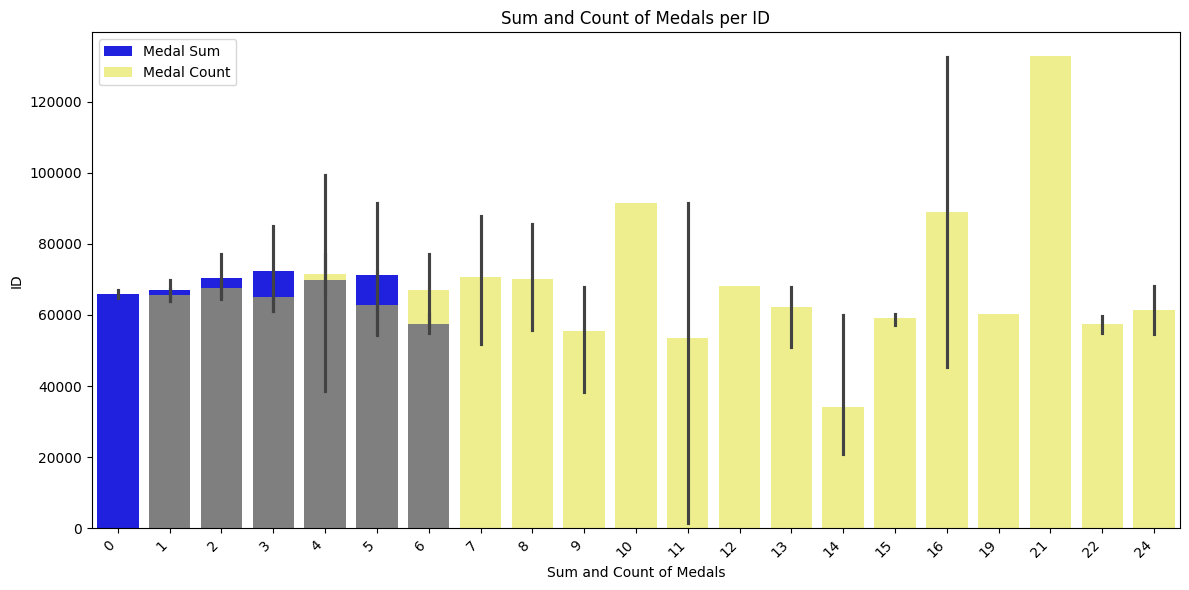

In [ ]:

# 그래프 데이터
df_kor_gb = df_kor1.groupby('ID')['Medal_cnt'].agg(['sum','count']).sort_values(by=['sum','count'], ascending=False)

# Create the figure and axes for the plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)

# Barplot to visualize the 'sum' (total medals) and 'count' for each 'ID'
sns.barplot(x='sum', y=df_kor_gb.index, data=df_kor_gb, color='blue', label='Medal Sum')
sns.barplot(x='count', y=df_kor_gb.index, data=df_kor_gb, color='yellow', label='Medal Count', alpha=0.5)

# Add labels and title
plt.title('Sum and Count of Medals per ID')
plt.xlabel('Sum and Count of Medals')
plt.ylabel('ID')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df_kor_gb[df_kor_gb['count'] > 15].sort_values(by='count', ascending=False)

,sum,count
ID,,
68029,2,24
54559,0,24
55000,0,22
59841,0,22
132854,1,21
60241,0,19
132544,1,16
45500,0,16


In [ ]:
df_kor1[df_kor1['ID'] == 54882]

,ID,Name,Sex,Year,Season,Sport,Event,Medal_gb,Medal_cnt
107906,54882,Jin Jong-O,M,2004,Summer,Shooting,"Shooting Men's Air Pistol, 10 metres",0,0
107907,54882,Jin Jong-O,M,2004,Summer,Shooting,"Shooting Men's Free Pistol, 50 metres",2,1
107908,54882,Jin Jong-O,M,2008,Summer,Shooting,"Shooting Men's Air Pistol, 10 metres",2,1
107909,54882,Jin Jong-O,M,2008,Summer,Shooting,"Shooting Men's Free Pistol, 50 metres",1,1
107910,54882,Jin Jong-O,M,2012,Summer,Shooting,"Shooting Men's Air Pistol, 10 metres",1,1
107911,54882,Jin Jong-O,M,2012,Summer,Shooting,"Shooting Men's Free Pistol, 50 metres",1,1
107912,54882,Jin Jong-O,M,2016,Summer,Shooting,"Shooting Men's Air Pistol, 10 metres",0,0
107913,54882,Jin Jong-O,M,2016,Summer,Shooting,"Shooting Men's Free Pistol, 50 metres",1,1


In [ ]:
#메달수가 5이상인 대상건
df_kor_gb[df_kor_gb['sum'] > 5].sort_values(by='sum', ascending=False)

#참석한 모든 대회에서 메달을 획득한 선수 및 종목은?
df_case1 = df_kor_gb[df_kor_gb['sum'] == df_kor_gb['count']].sort_values(by='sum', ascending=False)
df_case1.head(3)


,sum,count
ID,,
60274,6,6
91596,4,4
59520,4,4


In [ ]:
# id별 메달집계
df_case1 = df_kor1.filter(items=['ID','Sport','Event','Medal_gb','Medal_cnt'])
df_case1_1 = df_case1.groupby(['ID', 'Sport'])['Medal_cnt'].agg(['sum','count'])
df_case1_1.head(3)

,,sum,count
ID,Sport,,
1422,Cross Country Skiing,0,11
3566,Judo,1,1
3567,Judo,1,2


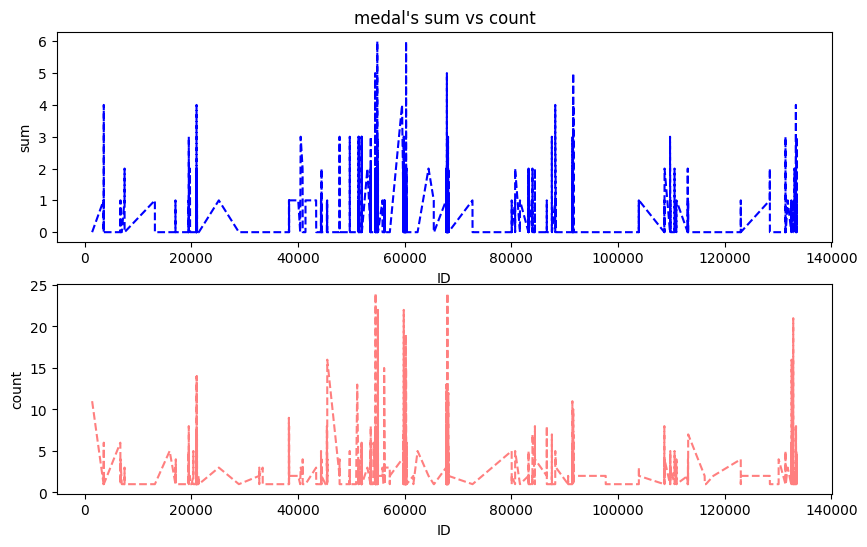

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

df_case1 = df_kor1.filter(items=['ID','Sport','Event','Medal_gb','Medal_cnt'])
df_case1_1 = df_case1.groupby(['ID'])['Medal_cnt'].agg(['sum','count'])

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(df_case1_1.index.values, df_case1_1['sum'], linestyle= '--', color='b')
ax1.set_title("medal's sum vs count")
ax1.set_xlabel('ID')
ax1.set_ylabel('sum')

ax2.plot(df_case1_1.index.values, df_case1_1['count'], linestyle= '--', color='r', alpha=0.5)
#ax2.set_title("medal's count")
ax2.set_xlabel('ID')
ax2.set_ylabel('count')
plt.show()


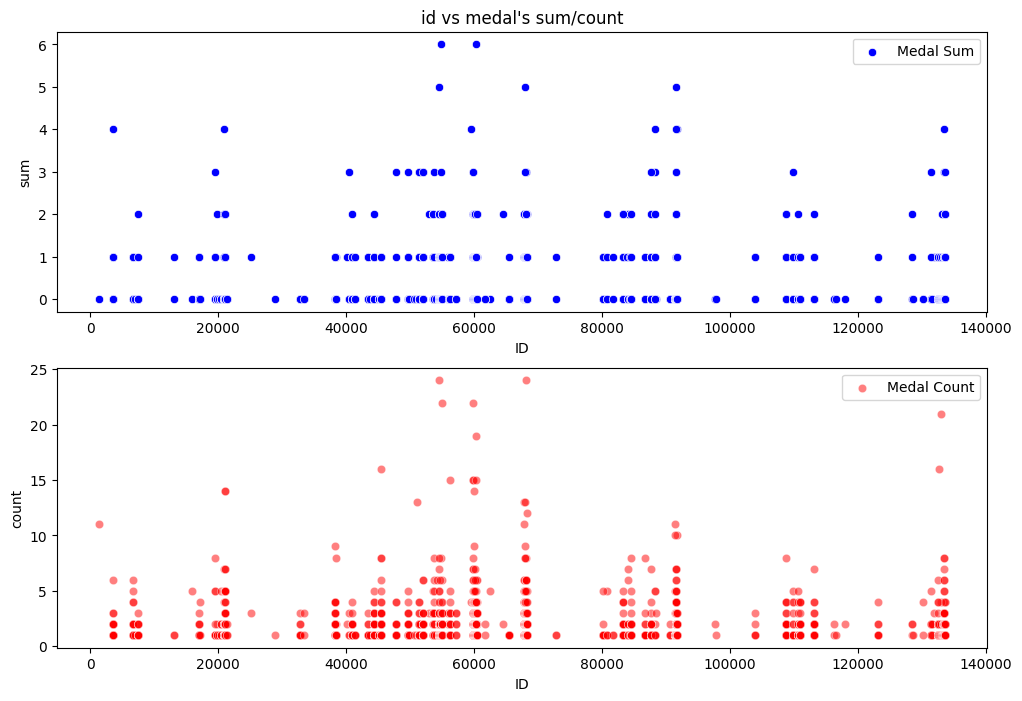

In [ ]:
#선수별-메달 sum, count 집계
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

df_case1 = df_kor1.filter(items=['ID','Sport','Event','Medal_gb','Medal_cnt'])
df_case1_1 = df_case1.groupby(['ID'])['Medal_cnt'].agg(['sum','count']).sort_values(by=['sum','count'],axis=0, ascending=False)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.scatterplot(x=df_case1_1.index, y='sum', data=df_case1_1, color='blue', label='Medal Sum')
plt.title("id vs medal's sum/count")

plt.subplot(2, 1, 2)
sns.scatterplot(x=df_case1_1.index, y='count', data=df_case1_1, color='red', label='Medal Count',alpha=0.5)
#plt.title("id vs medal's count")
plt.show()

- 개인별 medal을 획득한 sport 및 아직 미획득한 sport를 비교

45


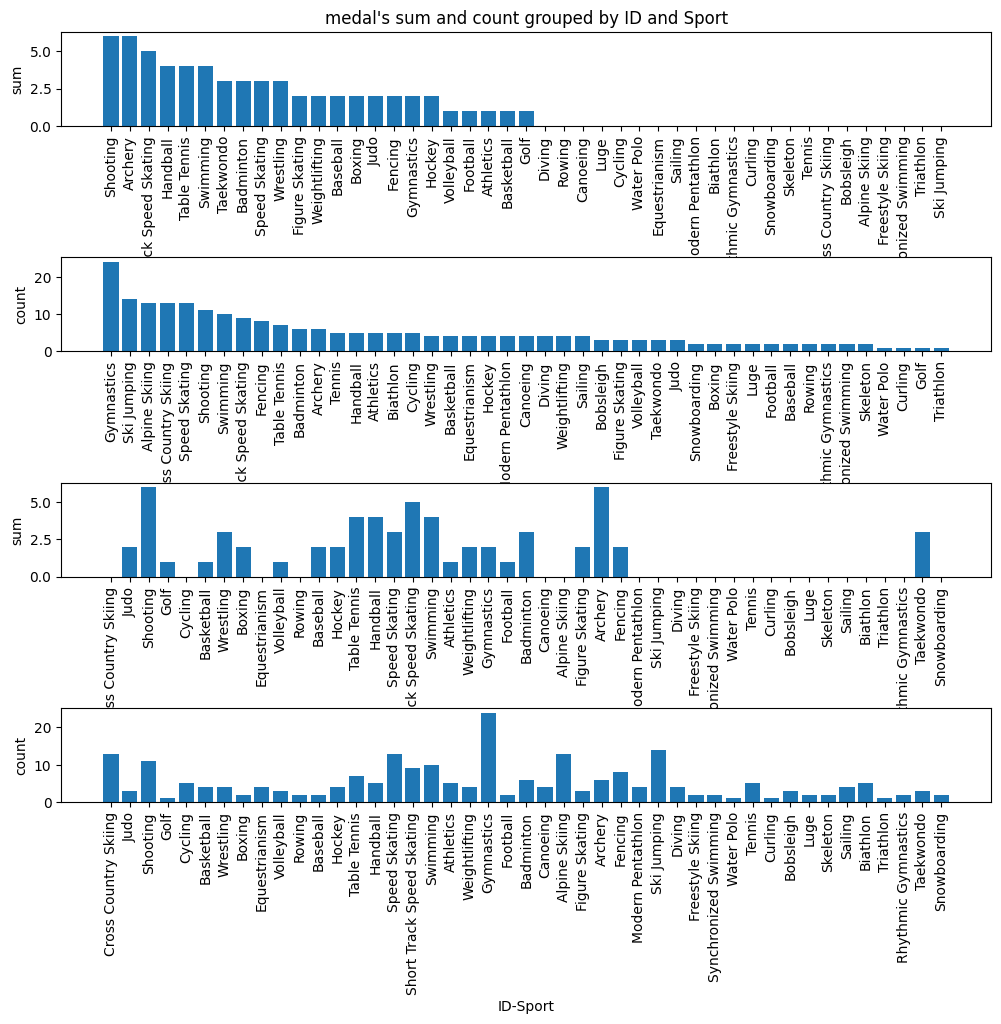

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

df_case1 = df_kor1.filter(items=['ID','Sport','Event','Medal_gb','Medal_cnt'])
#df_case1_2 = df_case1.groupby(['ID','Sport'])['Medal_cnt'].agg(['sum','count']).sort_values(by=['sum','count'],axis=0, ascending=False)
df_case1_2 = df_case1.groupby(['ID','Sport'])['Medal_cnt'].agg(['sum','count']).sort_values(by=['sum'],axis=0, ascending=False)
df_case1_3 = df_case1.groupby(['ID','Sport'])['Medal_cnt'].agg(['sum','count']).sort_values(by=['count'],axis=0, ascending=False)
df_case1_4 = df_case1.groupby(['ID','Sport'])['Medal_cnt'].agg(['sum','count'])

df_case1_2 = df_case1_2.reset_index()
df_case1_2.head(3)

print(df_case1_2['Sport'].value_counts().count())

plt.figure(figsize=(12, 10))

plt.subplot(7, 1, 1)
plt.bar(df_case1_2['Sport'], df_case1_2['sum'])
plt.xlabel('ID-Sport')
plt.ylabel('sum')
plt.title("medal's sum and count grouped by ID and Sport")
plt.xticks(rotation=90)


df_case1_3 = df_case1_3.reset_index()
plt.subplot(7, 1, 3)
plt.bar(df_case1_3['Sport'], df_case1_3['count'])
plt.xlabel('ID-Sport')
plt.ylabel('count')
#plt.title("medal's count grouped by ID and Sport")
plt.xticks(rotation=90)

df_case1_4 = df_case1_4.reset_index()
plt.subplot(7, 1, 5)
plt.bar(df_case1_4['Sport'], df_case1_4['sum'])
plt.xlabel('ID-Sport')
plt.ylabel('sum')
#plt.title("medal's count grouped by ID and Sport")
plt.xticks(rotation=90)

plt.subplot(7, 1, 7)
plt.bar(df_case1_4['Sport'], df_case1_4['count'])
plt.xlabel('ID-Sport')
plt.ylabel('count')
#plt.title("medal's count grouped by ID and Sport")
plt.xticks(rotation=90)

plt.show()

 - sport별 선수인원, 메달수집계

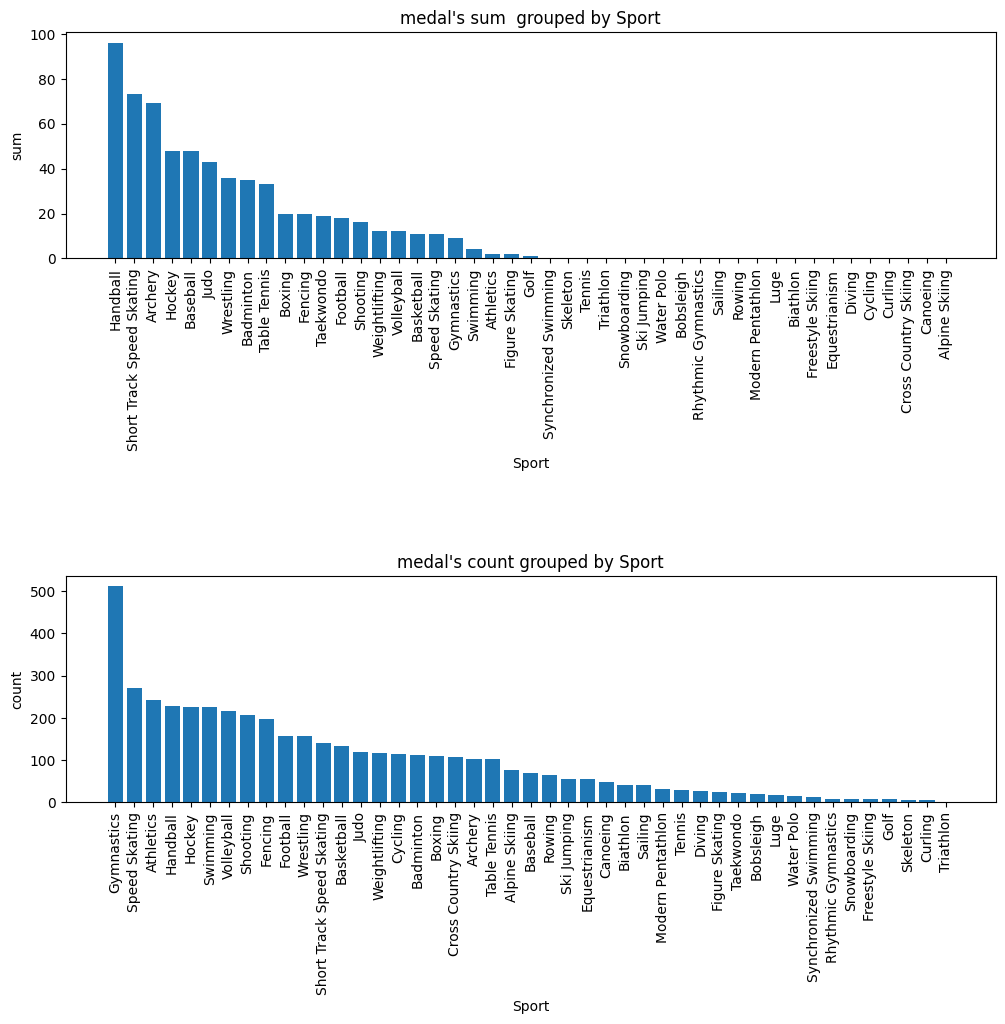

In [ ]:
# sport별 선수인원, 메달수집계
df_case2 = df_kor1.filter(items=['ID','Sport','Event','Medal_gb','Medal_cnt'])
df_case2_1 = df_case2.groupby(['Sport'])['Medal_cnt'].agg(['sum','count']).sort_values(by=['sum'],axis=0, ascending=False)
df_case2_2 = df_case2.groupby(['Sport'])['Medal_cnt'].agg(['sum','count']).sort_values(by=['count'],axis=0, ascending=False)

df_case2_1 = df_case2_1.reset_index()

plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.bar(df_case2_1['Sport'], df_case2_1['sum'])
plt.xlabel('Sport')
plt.ylabel('sum')
plt.title("medal's sum  grouped by Sport")
plt.xticks(rotation=90)

df_case2_2 = df_case2_2.reset_index()
plt.subplot(3, 1, 3)
plt.bar(df_case2_2['Sport'], df_case2_2['count'])
plt.xlabel('Sport')
plt.ylabel('count')
plt.title("medal's count grouped by Sport")
plt.xticks(rotation=90)

plt.show()

In [ ]:
df_case2 = df_kor1.filter(items=['ID','Sport','Event','Medal_gb','Medal_cnt'])
df_case2_1 = df_case2.groupby(['Sport'])['Medal_cnt'].agg(['sum','count']).sort_values(by=['sum'],axis=0, ascending=False)
df_case2_1.tail(20)

,sum,count
Sport,,
Tennis,0,29
Triathlon,0,1
Snowboarding,0,7
Ski Jumping,0,54
Water Polo,0,13
Bobsleigh,0,18
Rhythmic Gymnastics,0,7
Sailing,0,40
Rowing,0,64


- 부진한 종목기준(메달수=0)으로 참석한 년도 및 시즌을 확인

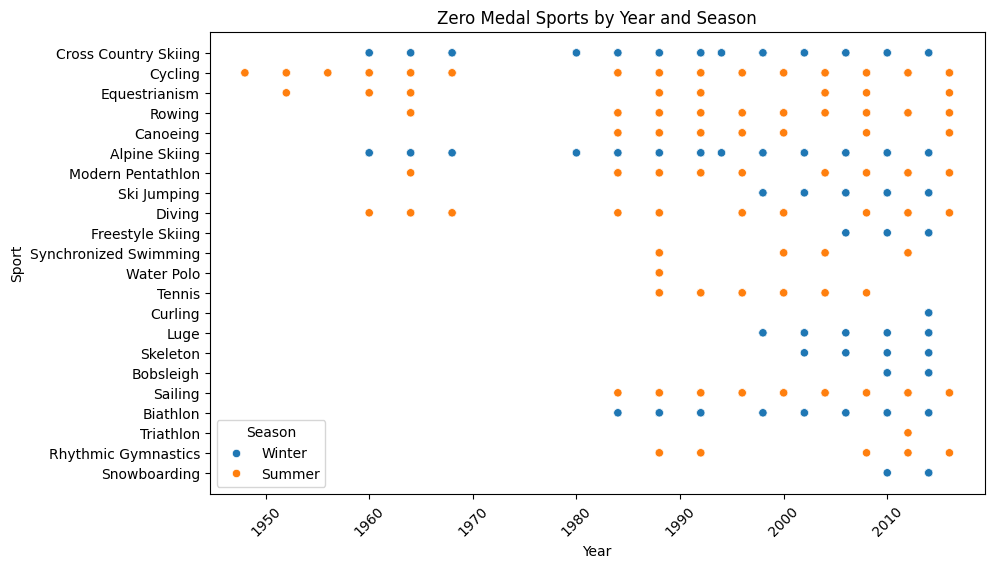

In [ ]:
#ID	Name	Sex	Year	Season	Sport	Event	Medal_gb	Medal_cnt
df_case3 = df_kor1.filter(items=['ID','Year','Season','Sport','Event','Medal_gb','Medal_cnt'])

#전체 sport대상
all_medal_sports = df_case3.groupby(['Sport'])['Medal_cnt'].sum()
#0건인 sport대상
zero_medal_sports = all_medal_sports[all_medal_sports == 0].index.tolist()
#Sport,Year,Season
df_case3_1 = df_case3[df_case3['Sport'].isin(zero_medal_sports)][['Sport', 'Year', 'Season']]

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_case3_1, x='Year', y='Sport', hue='Season')
plt.title('Zero Medal Sports by Year and Season')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_case3_1[df_case3_1['Sport'] == 'Cross Country Skiing'].sort_values(by=['Year'],axis=0, ascending=True)

,Sport,Year,Season
117819,Cross Country Skiing,1960,Winter
117820,Cross Country Skiing,1960,Winter
263603,Cross Country Skiing,1964,Winter
263602,Cross Country Skiing,1964,Winter
265430,Cross Country Skiing,1968,Winter
...,...,...,...
134008,Cross Country Skiing,2014,Winter
134009,Cross Country Skiing,2014,Winter
101022,Cross Country Skiing,2014,Winter
101023,Cross Country Skiing,2014,Winter


In [ ]:
#메달수가 5이상인 대상건
df_kor_gb[df_kor_gb['sum'] == 0].sort_values(by='sum', ascending=False)
df_kor_gb

,sum,count
ID,,
54882,6,8
60274,6,6
67926,5,9
54483,5,7
91605,5,7
...,...,...
133485,0,1
133487,0,1
133489,0,1


In [ ]:
#참석한 모든 대회에서 메달을 획득한 선수 및 종목은?
df_case1 = df_kor_gb[df_kor_gb['sum'] == df_kor_gb['count']].sort_values(by='sum', ascending=False)
df_case1.head(3)